# 한국어 특징

- 언어 공통
    - 문장내 모호성이 부과
        - 예시
        - `차`라는 단어를 여러번 사용
            - 축구공을 `차`던 `차`에 `차`가 마시고 싶어서, 카페에 가는 `차`안에서, ... `차`였다
                - 해당 문장을 번역 앱 -> 진행하면 각기 다른 형태로 번역이 진행
            - **언어는 최소 정보로 최대한 정보를 표현하고자 하는 경향이 존재**
    - 불연속 데이터
        - 자연어 => 연속형 데이터로 구성 변형이 필요
            - 임베딩등
    - 다양한 표현
        - 하나의 사물을 보고 여러 형태로 해석, 표현이 가능
- 한국어
    - 교착어
        - 어근+접사 형태로 표현, 문법적 의미도 진행
        - 형태소 분석기 사용 필요
    - 띄어쓰기
        - 제 각각 -> 해석이 가능함
        - 형태소 분석기 사용 필요
    - 평서문, 의문문 애매한 문제 존재
        - 밥 먹었어, 밥 먹었어?
    - 주어 생략
        - 동사를 중시하는 성향
    - 한자 기반 언어
        - 한자 조합이 많이 존재
        - 한글(표음문자), 한자(표의(어)문자)
            -> 정보손실 존재
    - 위의 모든 문제를 해결하는 가장 좋은 방법
        - 대량의 학습

# 카운트기반 언어모델(표현) (Count Based word Representation)

- 국소 표현 방법 (local)
    - 단어(토큰)를 새로 만나면 번호 부여
        - 1, 2, 3 순차 부여
    - 번호 자체에 대한 뉘앙스 없음
    - 이산 표현
    - **TF-IDF**, DTM, Bow
    - TF-IDF : 국소표현 + 비중을 부여하는 방식
        - **수치는 연속형으로 나옴**

- 분산 표현 방법 (distributioned)
    - 뉘앙스 부여
    - 단어 표현 -> 주변 참고
    - dog 단어 옆에 cute, lovely등 단어가 자주 보인다면 -> 이런 단어에 가중치 부여(비중 부여)
    - 연속형 표현
    - Word2Vec, FastTExt, Glove

# TF-IDF 직접 구현

- 단어 빈도-역문서 빈도 표현법
    - Term Frequency-Inverse Document Frequency
    - 2개의 정보를 혼합 -> 단어를 수치화 -> 문장을 수치화 -> 문장의 백터화

- 정의
    - 단어 빈도
        - **한개 문장내 단어가 몇번** 등장하는가
    - 역외 빈도
        - **여러 문장내 이 단어가 몇번** 나오는가
    - 각 단어들의 중요도 척도를 가중치로 부여하는 방식

- 활용
    - 문장(서)의 유사도 검사
    - 검색 결과에 중요도 표시
    - 문장내 특정 단어의 중요도 처리
    - .. -> 문장의 핵심 키워드 판단

In [28]:
import pandas as pd
from math import log

In [29]:
# 1. 말뭉치 준비, 짧은 문장, 중복단어 임의 배치
docs = [
    '먹고 싶은 사과',
    '맛있는 음식 돈까스',
    '맛있는 치즈 돈까스 돈까스',
    '저는 과일이 좋아요',
]

In [30]:
# 2. 사전 준비, 사전준비
# 중복없이, 공백단위로 각각의 단어를 추출하여 리스트로 구성
# 실습 1분
vocab = list( set( word for doc in docs for word in doc.split() ) )
vocab.sort()
vocab

['과일이', '돈까스', '맛있는', '먹고', '사과', '싶은', '음식', '저는', '좋아요', '치즈']

In [31]:
# 3. 원문 문장의 개수 획득
N = len( docs )
N

4

##### TF(Term Frequency) 구현

In [32]:
# 특정 문자열에서 특정 문자열이 몇번 등장하는지 체크
# 아래 문자열에서 돈까스가 몇회 등장하는지 구현, 실습 30초
# 부재시 0, 존재하면 등장 횟수 리턴
docs[2].count('돈까스'), docs[2].count('돈까스2')

(2, 0)

In [33]:
# 함수 구현- 실습 1분
def tf(token:str, doc:str) -> int:
    '''
        - token:특정 단어
        - doc:대상 문장
    '''
    return doc.count( token )

tf('돈까스', docs[2])

2

##### IDF(Inverse Document Frequency) 구현

In [34]:
# 개수에 상관없이 존재여부만 체크
'돈까스' in docs[2]

True

In [35]:
cnt = 0
cnt += True
cnt

1

In [36]:
# 여러 문장에 특정 단어가 몇번 등장하는가
# 한 문장에 특정 단어가 여러번 나와도 문장당 최대 등장 회수는 1회
# 실습 : 1분
def idf(token:str, docs:list) -> int:
    cnt = 0
    for doc in docs:
        cnt += token in doc
    #return cnt
    return log( N/(cnt+1) )

# 여러 문장에 등장=> 값이 낮고, 반대면 높다
idf('돈까스', docs), idf('치즈', docs)

(0.28768207245178085, 0.6931471805599453)

In [37]:
# tf-idf 계산
def tf_idf( token, doc, docs):
    return tf(token, doc) * idf(token, docs)

tf_idf( '돈까스', docs[2], docs )

# tf는 이산형표현, idf는 연속형 => 연산수행 => 연속형으로 나옴

0.5753641449035617

##### TF-IDF로 문장의 백터화

In [38]:
# TF 기반 모든 문장을 DF로 표현
trans_results = list()
for i in range(N): # N은 문장의 수
    trans_results.append( list() )
    # 문장 1개 획득
    doc = docs[ i ]
    # 문장내 특정 토큰이 몇번 등장하는가? => TF 함수이용
    for token in vocab: # 토큰 단위로 반복
        # 문장이 새로 검색 -> 리스트 하나씩 추가
        trans_results[-1].append( tf( token, doc ) )
    # 실습 2분
    pass

#trans_results
# (4:데이터수,N, 10:토큰수)
tf_df = pd.DataFrame( trans_results, columns=vocab )
tf_df

# '먹고 싶은 사과',
# [ [0 0 0 1 1 1 0 0 0 0], [...], ..]

,과일이,돈까스,맛있는,먹고,사과,싶은,음식,저는,좋아요,치즈
0,0,0,0,1,1,1,0,0,0,0
1,0,1,1,0,0,0,1,0,0,0
2,0,2,1,0,0,0,0,0,0,1
3,1,0,0,0,0,0,0,1,1,0


In [39]:
# idf
res = [ idf(token, docs) for token in vocab ]

idf_df = pd.DataFrame( res, index=vocab, columns=['IDF'])
idf_df

,IDF
과일이,0.693147
돈까스,0.287682
맛있는,0.287682
먹고,0.693147
사과,0.693147
싶은,0.693147
음식,0.693147
저는,0.693147
좋아요,0.693147
치즈,0.693147


In [40]:
# tf-idf 로 백터화한 문장 데이터의 df 확인

trans_results = list()
for i in range(N):
    trans_results.append( list() )
    doc = docs[ i ]
    for token in vocab:
        trans_results[-1].append( tf_idf( token, doc, docs ) )

tf_idf_df = pd.DataFrame( trans_results, columns=vocab )
tf_idf_df

,과일이,돈까스,맛있는,먹고,사과,싶은,음식,저는,좋아요,치즈
0,0.000000,0.000000,0.000000,0.693147,0.693147,0.693147,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.287682,0.287682,0.000000,0.000000,0.000000,0.693147,0.000000,0.000000,0.000000
2,0.000000,0.575364,0.287682,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.693147
3,0.693147,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.693147,0.693147,0.000000


# sklearn에서 제공기능 사용

In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer

# min_df=2 => 1회만 등장하는 토큰은 배제
vectorizer = TfidfVectorizer(min_df=1, decode_error='ignore')

In [42]:
tf_idf_vec = vectorizer.fit( docs )

In [43]:
tf_idf_vec.vocabulary_

{'먹고': 3,
 '싶은': 5,
 '사과': 4,
 '맛있는': 2,
 '음식': 6,
 '돈까스': 1,
 '치즈': 9,
 '저는': 7,
 '과일이': 0,
 '좋아요': 8}

In [44]:
X = tf_idf_vec.transform( docs )
X.shape

(4, 10)

In [45]:
pd.DataFrame( X.toarray(), columns=vocab)
# 직접 구현 부분과 값 차이가 존재 -> log()값 부분 확인

,과일이,돈까스,맛있는,먹고,사과,싶은,음식,저는,좋아요,치즈
0,0.00000,0.000000,0.000000,0.57735,0.57735,0.57735,0.000000,0.00000,0.00000,0.000000
1,0.00000,0.526405,0.526405,0.00000,0.00000,0.00000,0.667679,0.00000,0.00000,0.000000
2,0.00000,0.777982,0.388991,0.00000,0.00000,0.00000,0.000000,0.00000,0.00000,0.493386
3,0.57735,0.000000,0.000000,0.00000,0.00000,0.00000,0.000000,0.57735,0.57735,0.000000


# TF-IDF를 제공하는 모듈을 사용 유사도+챗봇

- 토큰화, 임베딩 : TF-IDF
- UI : gradio
- 챗봇 시트
    - korpora
        - 챗봇 시트 획득
- 원리
    - 질문
        - TD-IDF 변환
        - 사전에 준비( 챗봇 시트중 질문 파트를 백터화)된 데이터화 유사도 검사
            - 질문 데이터->TD-IDF변환->메모리상 로드
        - 가장 거리가 가까운 질문 검색
            - 백터간 거리 계산
                - 코사인 유사도(사용)
                - 유클리디언 유사도
                - 맨하턴 거리
                - 자카드 유사도
                - ...
    - 응답
        - 질문에 해당되는 답변

## 데이터 획득

In [46]:
# https://github.com/ko-nlp/Korpora?tab=readme-ov-file
# 챗봇 시트
!curl https://raw.githubusercontent.com/songys/Chatbot_data/master/ChatbotData.csv > ChatbotData.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  868k  100  868k    0     0  2259k      0 --:--:-- --:--:-- --:--:-- 2262k


In [47]:
chatbot_df = pd.read_csv('ChatbotData.csv')
chatbot_df.head(2)

,Q,A,label
0,12시 땡!,하루가 또 가네요.,0
1,1지망 학교 떨어졌어,위로해 드립니다.,0


## 형태소 분석기 -> 분절 -> 공백기반으로 문장 보정

- LLM에서는 해당 과정이 생략됨
    - 한국어 -> 영어로 변경 질의 -> 정확한 결과를 획득하는 방법 : 점차 해결될듯

In [48]:
!pip install -q konlpy

In [49]:
# chatbot_df.Q => 분절 => 다시 문장으로 구성
from konlpy.tag import Okt

okt = Okt()

In [50]:
# 형태소 분석기를 이용 문장 전처리 수행(조사, 형용사 등등 분리)
chatbot_df['Q'] = chatbot_df.Q.apply( lambda x:' '.join(okt.morphs(x)))

## 코퍼스(df형태)->TF-IDF기반 사전화->백터화

In [51]:
# 실습 3분
vectorizer  = TfidfVectorizer(min_df=1, decode_error='ignore')
vec         = vectorizer.fit( chatbot_df.Q ) # 질문 학습
print( '사전에 등록된 토큰수', len(vec.vocabulary_), vec.vocabulary_)
X           = vec.transform( chatbot_df.Q )  # 질문 데이터 백터화 -> 차후 백터디비입력
# 백터디비의 질의 => 유사도 검사 => 가장 가까운 데이터를 획득
# CSR 형식으로 압축 표현
# 질문에 대한 백터 처리
X
# 문장 1개를 표현하는 수 => 8195

사전에 등록된 토큰수 8195 {'12시': 9, '지망': 6685, '학교': 7634, '떨어졌어': 2116, '4일': 39, '놀러': 1337, '가고': 67, '싶다': 4402, '정도': 6294, 'ppl': 56, '심하네': 4387, 'sd': 57, '카드': 7170, '망가졌어': 2455, 'sns': 58, '맞팔': 2503, '하지': 7623, 'ㅠㅠ': 63, '시간': 4246, '낭비': 1215, '아는데': 4567, '매일': 2520, '하는': 7554, '인데': 5758, '자꾸': 6013, '보게': 3252, '보면': 3329, '빼고': 3683, '행복': 7854, '해보여': 7739, '가끔': 77, '궁금해': 621, '하는지': 7568, '혼자': 8013, '인게': 5753, '좋다': 6398, '가난한': 79, '자의': 6051, '설움': 4027, '가만': 107, '있어도': 5904, '난다': 1141, '가상': 127, '화폐': 8036, '쫄딱': 6842, '망함': 2463, '가스': 130, '켜고': 7201, '나갔어': 1034, '켜놓고': 7202, '나온거': 1094, '같아': 274, '너무': 1280, '많이': 2414, '나왔다': 1114, '비싼데': 3617, '감기': 212, '걸리겠어': 371, '장난': 6155, '아님': 4605, '가장': 151, '확실한': 8042, '가족': 157, '여행': 5169, '가기': 70, '했어': 7840, '고고': 447, '어디': 4911, '가지': 159, '있어': 5903, '관계': 529, '알려': 4811, '끼리': 1012, '간다': 170, '보고': 3253, '싶어': 4409, '이랑': 5615, '서먹해': 3977, '서먹해졌어': 3978, '갈거야': 195, '가야': 134, '누구': 1387, '가려고': 

<11823x8195 sparse matrix of type '<class 'numpy.float64'>'
	with 39355 stored elements in Compressed Sparse Row format>

In [52]:
# 질문 -> 형태소 분석기 분절-> 문장으로 보정
question = '오늘 저녁은 어떤 것을 먹을까요?'
kor_sentence_transform = lambda x:' '.join(okt.morphs(x))
kor_sentence_transform( question )

'오늘 저녁 은 어떤 것 을 먹을까요 ?'

In [53]:
# 질문 -> 형태소 분절-> 공백기반 문장 보정 -> TF-IDF 기반 백터화
question_vector = vec.transform( [ kor_sentence_transform( question ) ] )
question_vector

<1x8195 sparse matrix of type '<class 'numpy.float64'>'
	with 3 stored elements in Compressed Sparse Row format>

In [54]:
# 배열로 확인, 형상 체크
question_vector.toarray(), question_vector.toarray().shape

(array([[0., 0., 0., ..., 0., 0., 0.]]), (1, 8195))

In [56]:
# 편의상 df의 맴버로 추가
# Q -> Q_vec 파생변수로 추가 . 배열로 세팅
# X에서 하나씩 뽑아서 데이터로 추가 or X가 없다고 가정, apply()를 통해서 한문장씩 처리하여 묶어서 추가
chatbot_df['Q_vec'] = chatbot_df.Q.apply(
    lambda x:vec.transform( [ x ] ).toarray()[0] )

chatbot_df.head(1)

,Q,A,label,Q_vec
0,12시 땡 !,하루가 또 가네요.,0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


## 유사도 계산

- **코사인 유사도** (사용)
    - **문장을 백터화** 할때 **빈도**를 계산하는(빈도가 포함되는) 데이터를 이용하여 백터간(문장간) 유사도를 계산
    - 0 ~ 1 사이값으로 존재할대 의미를 가진다
        - 백터방향 일치 1
        - 90도 0
        - 반대방향 -1
    - **정보검색**, 텍스트마이닝, 클러스터응축도체크
        - 백터디비로 구성될때 검색의 기반
        - 문서(백터화된)의 길이 정규화
- 구현방법
    - 커스텀으로 계산식 구현
    - API를 사용 계산

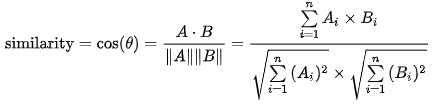

In [57]:
from IPython.display import Image
Image('/content/drive/MyDrive/데이터분석스쿨2기/share/12.데이터활용및과학방법론-12/rnn/코사인유사도.png')

- 분자 : 내적
- 분모 : 특정백터내에 두점간(여러 조합이 가능)의 거리를 계산, 대상이 되는 각각 백터에서 계산
    - 백터 공간의 유클리디이언 거리를 계산(각각 백터간)
        - np.linalg.norm()
    - 거리 측정 => 음수가능성 있음 => 제곱합 => 루트 처리

##### 직접구현(공식기반)

In [60]:
import numpy as np
# 직접 구현
def cos_sim( a_vec, b_vec ):
    return np.dot(a_vec, b_vec) / np.linalg.norm(a_vec)*np.linalg.norm(b_vec)

# 질문
my_question = question_vector.toarray()[0]
# 챗봇시트상 샘플 질문 1개와 비교
cos_sim( my_question, chatbot_df['Q_vec'][100]), question, chatbot_df['Q'][100]

(0.0, '오늘 저녁은 어떤 것을 먹을까요?', '거지 됐어')

##### API 사용

In [63]:
from sklearn.metrics.pairwise import cosine_similarity

# 값이 존재하는 샘플로 체크 -> 직접 구현으로 사용후 대체 구현
cosine_similarity( my_question.reshape(-1, 1), chatbot_df['Q_vec'][100].reshape(-1, 1) )[0]

array([0., 0., 0., ..., 0., 0., 0.])

##### 모든 질문과 체크, 가장 가까운 질문 획득후 답변구현

In [66]:
%%time
# 응답시간 => 서비스 질

def check_answer_q_sim( user_sentence:str = '') -> str:
    # 1. 질문 값이 비워 있으면 적절한 메세지 응답후 종료->값체크
    msg = user_sentence.strip()
    if not msg:
        return '정확하게 입력 후 문의 하세요'

    # 2. 사용자 질문 백터화
    # vec은 사전에 준비되어 있음
    user_sentence_vec = vec.transform(
                        [ kor_sentence_transform( msg ) ] ).toarray()[0]
    # 토크나이저 -> 체크 -> 사전의 개수(토큰이 몇개 등록되었는지?)
    if np.max( user_sentence_vec ) == 0.:
        # 백터가 모두 0으로 구성되었다
        # 질문 -> 백터화 -> vec에 등재된 사전에 해당 토큰이 일치되는게 없다 -> unknown(모름)
        return '해당 질문은 처리 불가합니다.'

    # 3. 사전에 준비된 질문 백터와 질문 백터간 비교 => 가장 큰값(가장 가깝다
    #    단, 가장 크긴한데 특정 임계값 이하면 일치되는 질문이 없다 (생략), QnA 구현
    #    예시 0.5가 임계라면 0.5 이하면 최대값으로 선정되어도 없는것으로 간주 -> 컨셉
    # 실습 3분 3/4번 구현
    # 질문 -> 질문시트 비교 -> 유사도계산 -> 파생변수(df상) 추가
    chatbot_df['sim'] = chatbot_df.Q_vec.apply( lambda x:cos_sim(user_sentence_vec, x) )


    # 4. 최고값을 얻는 데이터의 인덱스 획득 -> 답변 획득 -> 응답
    # idxmax() => 최대값을 가지고 있는 데이터의 인덱스값 리턴, 유사 argmax()
    return chatbot_df.loc[ chatbot_df['sim'].idxmax(skipna=True) ]['A']

# 질문 입력 -> 답변 응답
question = '오늘 저녁은 어떤 것을 먹을까요?'
question, check_answer_q_sim( question )

CPU times: user 346 ms, sys: 0 ns, total: 346 ms
Wall time: 374 ms


('오늘 저녁은 어떤 것을 먹을까요?', '맛있는 거 드세요.')

## WebUI 데모

In [ ]:
!pip install -q gradio

In [68]:
import gradio

def sentence_answer_chatbot( msg, hist ):
    return check_answer_q_sim( msg )

gradio.ChatInterface( sentence_answer_chatbot ).launch()

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://3650a43738bc82f06b.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


- 토크나이저만 이용한 챗봇
    - 챗봇 시트에 영향을 받음
    - 토크나이저 구성시 사용한 데이터의 토큰수에 영향
    - 창조적인 문구를 생성하는 기능 X -> 메뉴얼 대로 움직이는 방식

# 백본 기반 토크나이저별 어휘량

- 국내_사전학습된_트랜스포머기반_NLP모델.xlsx